# Pandas

Pandas is a Python library for loading, manipulating, and plotting data.
A good resource to get started is the [User Guide](https://pandas.pydata.org/docs/user_guide/index.html).

Once you're familiar with the style, keep the [full API reference](https://pandas.pydata.org/docs/reference/index.html) handy. 

In [5]:
import pandas as pd
#import numpy as np # numpy
import matplotlib.pyplot as plt

In [3]:
football_data = { 'year': [
2010, 2011, 2012,
2010, 2011, 2012,
2010, 2011, 2012
],
'team': [
    'FCBarcelona', 'FCBarcelona',
    'FCBarcelona', 'RMadrid',
    'RMadrid', 'RMadrid',
    'ValenciaCF', 'ValenciaCF',
    'ValenciaCF'
],
'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
'draws': [6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
}


In [4]:
football = pd.DataFrame(football_data, columns = ['year', 'team', 'wins', 'draws', 'losses'])

In [5]:
print(football)

   year         team  wins  draws  losses
0  2010  FCBarcelona    30      6       2
1  2011  FCBarcelona    28      7       3
2  2012  FCBarcelona    32      4       2
3  2010      RMadrid    29      5       4
4  2011      RMadrid    32      4       2
5  2012      RMadrid    26      7       5
6  2010   ValenciaCF    21      8       9
7  2011   ValenciaCF    17     10      11
8  2012   ValenciaCF    19      8      11


In [6]:
football.head()

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2


In [7]:
football.describe()

,year,wins,draws,losses
count,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,26.000000,6.555556,5.444444
std,0.866025,5.656854,2.006932,3.844188
min,2010.000000,17.000000,4.000000,2.000000
25%,2010.000000,21.000000,5.000000,2.000000
50%,2011.000000,28.000000,7.000000,4.000000
75%,2012.000000,30.000000,8.000000,9.000000
max,2012.000000,32.000000,10.000000,11.000000


In [8]:
football.shape

(9, 5)

In [9]:
football[['team','wins']]

,team,wins
0,FCBarcelona,30
1,FCBarcelona,28
2,FCBarcelona,32
3,RMadrid,29
4,RMadrid,32
5,RMadrid,26
6,ValenciaCF,21
7,ValenciaCF,17
8,ValenciaCF,19


In [10]:
football[ football['team'] == 'RMadrid' ]

,year,team,wins,draws,losses
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5


In [11]:
(football['team'] == 'RMadrid')

0    False
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
Name: team, dtype: bool

In [12]:
(football['team'] == 'ValenciaCF')

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
Name: team, dtype: bool

In [13]:
(football['team'] == 'RMadrid') | (football['team'] == 'ValenciaCF')

0    False
1    False
2    False
3     True
4     True
5     True
6     True
7     True
8     True
Name: team, dtype: bool

In [14]:
football[(football['team'] == 'RMadrid') | (football['team'] == 'ValenciaCF') ]

,year,team,wins,draws,losses
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


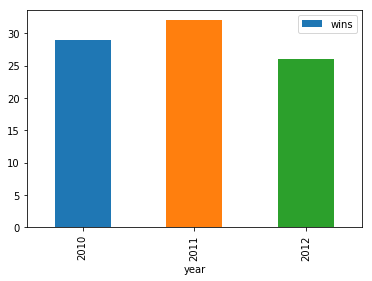

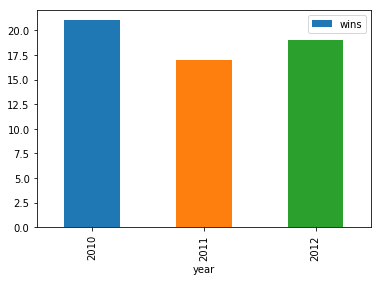

In [24]:
football[(football['team'] == 'RMadrid')].plot.bar(x='year', y='wins')
football[(football['team'] == 'ValenciaCF')].plot.bar(x='year', y='wins')

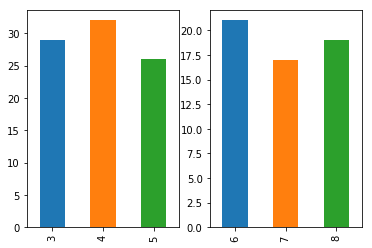

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)

football[football['team'] == 'RMadrid']['wins'].plot.bar(ax=axes[0])
football[football['team'] == 'ValenciaCF']['wins'].plot.bar(ax=axes[1])

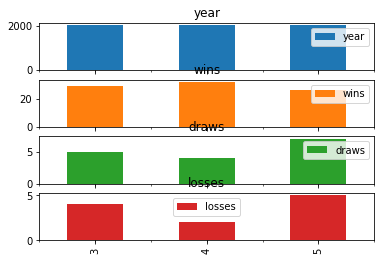

In [26]:
axes = football[football['team'] == 'RMadrid'].plot.bar(subplots=True)

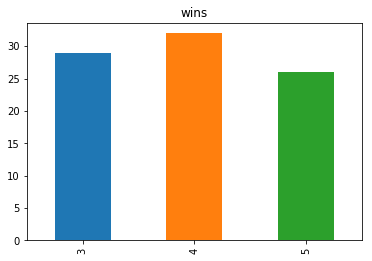

In [27]:
axes = football[football['team'] == 'RMadrid']['wins'].plot.bar(subplots=True)

In [41]:
football.pivot(index='year', columns='team', values='wins')

team,FCBarcelona,RMadrid,ValenciaCF
year,,,
2010,30,29,21
2011,28,32,17
2012,32,26,19


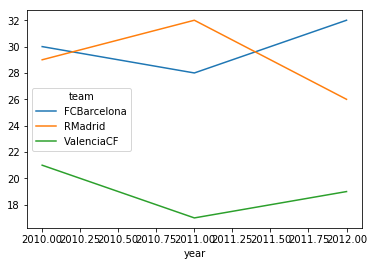

In [42]:
football.pivot(index='year', columns='team', values='wins').plot()

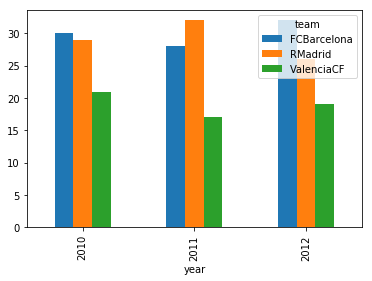

In [43]:
football.pivot(index='year', columns='team', values='wins').plot.bar()

## Adult Dataset Example

We will use the [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Begin by downloading the file `adult.data` and saving it somewhere nearby. Then we can read it into a data structure for further exploration.

### Vanilla Python data loading

In [51]:
# First, use "standard" python file opening, for posterity
file = open("data/adult.data", "r")

def str2int(a):
    """converts a string to an int if valid conversion"""
    return int(a) if a.isdigit() else 0

adults_data = []
count = 0
for line in file:
    # line will be a string of a line up until a newline
    row = line.split(', ') # transform string to list, splitting at delim
    count += 1
    if len(row) == 15:
        adults_data.append([
            str2int(row[0]), row[1],
            str2int(row[2]), row[3],
            str2int(row[4]), row[5],
            row[6], row[7], row[8],
            row[9], str2int(row[10]),
            str2int(row[11]), str2int(row[12]),
            row[13], row[14]
        ])
        
print(count)

32562


In [42]:
print(adults_data[1:2]) # use slicing so that it's still a "matrix"

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [50]:
len(adults_data)

32561

In [44]:
# Create a DataFrame
adults_frame = pd.DataFrame(adults_data)
adults_frame.columns = ['age', 'workclass', 'fnlwgt', 'education',
 'education-num', 'marital-status', 
 'occupation', 'relationship', 'race',
 'sex', 'capital_gain', 'capital_loss',
 'hr_per_week', 'country', 'income'
]
adults_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


### With Pandas

In [6]:
adults = pd.read_csv('data/adult.data',
                      header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     ) # Sigh, no headers provided
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adults[1:3]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
adults.shape

(32561, 15)

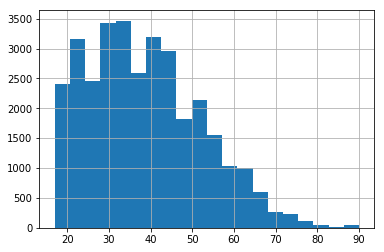

In [9]:
# plot a histogram
# each x is an age, the corresponding y is the number of
# rows that have that age
adults_age = adults['age'] # slice by column name!
adults_age.hist(density=0, histtype='stepfilled', bins=20)

In [10]:
#adults['age'].plot.bar()

In [11]:
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

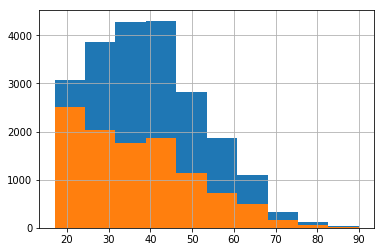

In [12]:
# Will plot the ages together

males['age'].hist()
females['age'].hist()

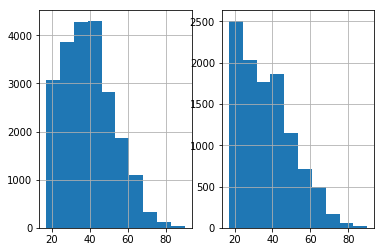

In [13]:
# plot separately

# gets handles to both the figure and the axes.
# matplotlib has more details
fig, axes = plt.subplots(nrows=1, ncols=2)

males['age'].hist(ax=axes[0])
females['age'].hist(ax=axes[1])

In [23]:
adults[['age', 'workclass']] #.groupby(by='workclass').count()

,age,workclass
0,39,State-gov
1,50,Self-emp-not-inc
2,38,Private
3,53,Private
4,28,Private
5,37,Private
6,49,Private
7,52,Self-emp-not-inc
8,31,Private
9,42,Private


In [43]:
adults.head(10)[['age', 'workclass', 'income']]

,age,workclass,income
0,39,State-gov,<=50K
1,50,Self-emp-not-inc,<=50K
2,38,Private,<=50K
3,53,Private,<=50K
4,28,Private,<=50K
5,37,Private,<=50K
6,49,Private,<=50K
7,52,Self-emp-not-inc,>50K
8,31,Private,>50K
9,42,Private,>50K


In [44]:
tmp = adults.head(10)[['occupation', 'income']]

In [45]:
tmp[tmp['income'] == ">50K"]

,occupation,income
7,Exec-managerial,>50K
8,Prof-specialty,>50K
9,Exec-managerial,>50K


In [46]:
tmp[tmp['income'] == ">50K"].groupby('occupation').count()

,income
occupation,
Exec-managerial,2
Prof-specialty,1
